In [1]:
%pip install Biopython


[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import Bio
from Bio.Seq import Seq

In [3]:
seqA = Seq('AAGCTTAGCTAGAGCAGTCAGCTAGCTAGCT')
seqB = Seq('TCTGAAGCTAGCTAGTGCATAGCTAGCTAGC')

In [22]:
# •	Determine score of best local alignment.
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

l_align = pairwise2.align.localxx(seqA, seqB, score_only=True)

print(l_align)

26.0


In [23]:
# •	Calculate similarity of DNA sequence A and sequence B using hamming distance method.
def hamming(seqA, seqB):
    return len([(a,b) for (a, b) in zip(seqA, seqB) if a != b])

print(hamming(seqA, seqB))

30


In [15]:
%pip install Levenshtein

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# •	Calculate similarity of DNA sequence A and sequence B using levenshtein distance method
from Levenshtein import distance

print(distance(seqA, seqB))

9


In [25]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\ficop\appdata\local\programs\python\python310\lib\site-packages (3.7.1)




[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


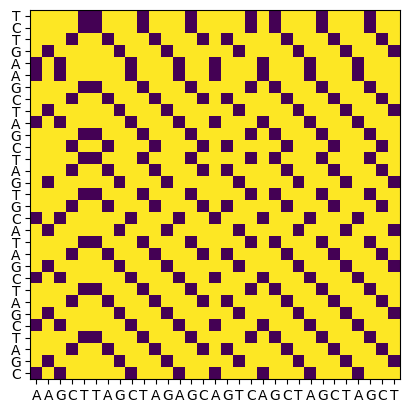

In [34]:
# •	Map DNA sequence A and sequence B similarity using dot plot technique.
from matplotlib import pyplot as plt
import numpy as np

def delta(x, y):
    return 0 if x == y else 1

def M(seq1, seq2, i, j, k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k], seq2[j:j+k]))

def makeMatrix(seq1, seq2, k):
    n = len(seqA)
    m = len(seqB)
    return [[M(seq1, seq2, i, j, k) for j in range(m-k+1)] for i in range(n-k+1)]

def fancyPlot(seqA, seqB):
    plt.imshow(np.array(makeMatrix(seqA, seqB, 1)))
    plt.xticks(np.arange(len(seqA)), seqA)
    plt.yticks(np.arange(len(seqB)), seqB)
    plt.show()

fancyPlot(seqA, seqB)